# Correlation

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
![ ! -f "./bodyfat/Bodyfat.csv" ] && git clone "https://gist.github.com/eee599d5256f9db493a6eab32e1dcbcf.git" ./bodyfat/

In [3]:
body_fat = pd.read_csv("./bodyfat/Bodyfat.csv")

In [4]:
body_fat.sample(10)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
111,1.0355,28.0,43,183.25,70.00,37.1,108.0,105.0,103.0,63.7,40.0,23.6,33.5,27.8,17.4
108,1.0593,17.3,43,194.00,75.50,38.5,110.1,88.7,102.1,57.5,40.0,24.8,35.1,30.7,19.2
203,1.0854,6.0,44,184.00,74.00,37.9,100.8,89.1,102.6,60.6,39.0,24.0,32.9,29.2,18.4
137,1.0325,29.4,43,187.75,74.00,37.7,97.8,98.6,100.6,63.6,39.2,23.8,34.3,28.4,17.7
123,1.0623,16.0,47,151.50,66.75,36.9,94.0,86.1,95.2,58.1,36.5,22.1,30.6,27.5,17.6
229,1.0601,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0
73,1.0680,13.5,55,125.00,64.00,33.2,87.7,76.0,88.6,50.9,35.4,19.1,29.3,25.7,16.9
225,1.0703,12.5,55,126.50,66.75,33.4,88.8,78.2,87.5,50.8,33.0,19.7,25.3,22.0,15.8
244,1.0334,29.0,67,199.50,68.50,40.7,118.3,106.1,101.6,58.2,38.8,24.1,32.1,29.3,18.5
222,1.0726,11.5,54,161.75,67.50,37.4,94.2,87.6,95.6,59.7,40.2,23.4,27.9,27.0,17.8


In [5]:
weight_height = body_fat.filter(["Weight", "Height"])

In [6]:
weight_height.corr()

,Weight,Height
Weight,1.000000,0.308279
Height,0.308279,1.000000


# Scatter Plot

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

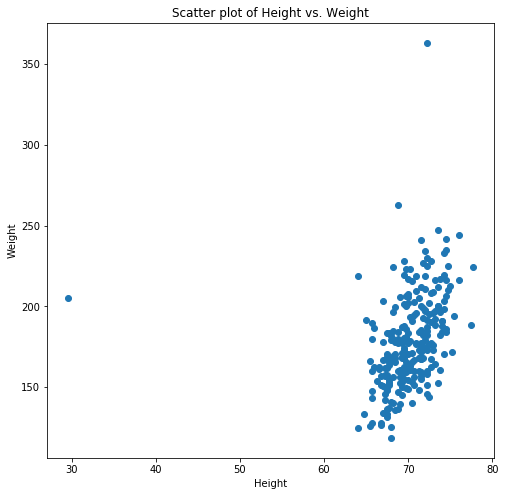

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat['Height'], body_fat['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Height vs. Weight")

# Remove Outliers

## By $1.5IQR$

In [8]:
height_iqr_lower = weight_height['Height'].quantile(0.25)
height_iqr_upper = weight_height['Height'].quantile(0.75)
weight_iqr_lower = weight_height['Weight'].quantile(0.25)
weight_iqr_upper = weight_height['Weight'].quantile(0.75)

In [9]:
body_fat_clean = weight_height[(body_fat['Height'] > height_iqr_lower) &
                               (body_fat['Height'] < height_iqr_upper) &
                               (body_fat['Weight'] < weight_iqr_upper) &
                               (body_fat['Weight'] > weight_iqr_lower)]

In [10]:
body_fat_clean

,Weight,Height
4,184.25,71.25
6,181.00,69.75
12,180.50,69.50
14,187.75,69.50
16,195.75,71.00
...,...,...
228,174.50,69.50
229,167.75,68.50
231,182.25,71.75
232,175.50,71.50


This doesn't look good because we've lost a lot of data due to the stretched shape of the blob.

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

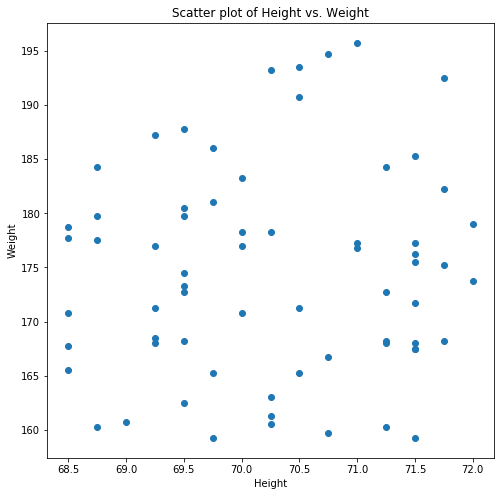

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs. Weight')

In [12]:
body_fat_clean.corr()

,Weight,Height
Weight,1.000000,0.068109
Height,0.068109,1.000000


## By Observation

In [13]:
body_fat_clean = weight_height[(body_fat['Height'] > 40) & (body_fat['Weight'] < 350)]

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

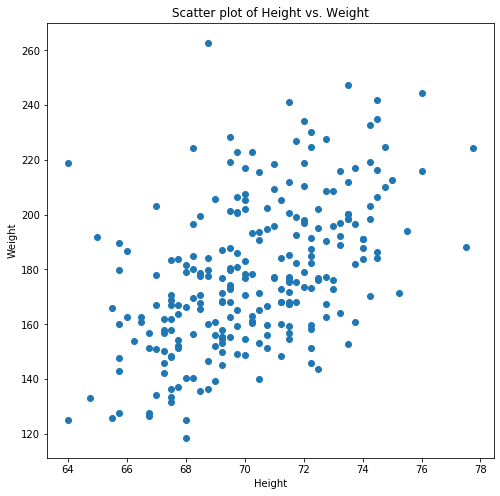

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs. Weight')

In [15]:
body_fat_clean.corr()

,Weight,Height
Weight,1.000000,0.512913
Height,0.512913,1.000000


# Prediction

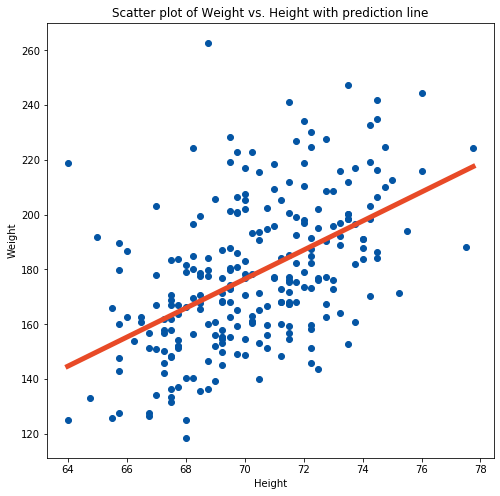

In [16]:
x_vals = np.array([np.min(body_fat_clean["Height"]), np.max(body_fat_clean["Height"])])
x_vals_standardized = (x_vals - body_fat_clean["Height"].mean()) / body_fat_clean["Height"].std(ddof=0)
y_predictions_standardized = body_fat_clean.corr()["Height"]["Weight"] * x_vals_standardized
y_predictions = y_predictions_standardized * body_fat_clean["Weight"].std(ddof=0) + body_fat_clean["Weight"].mean()
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'], color='#0455A4')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Weight vs. Height with prediction line")
plt.plot(x_vals, y_predictions, color='#E84A27', linewidth=5)